In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [5]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [8]:
titles.title.value_counts().sort_values(ascending=False)[:9]

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Temptation              12
Maya                    12
The Three Musketeers    11
Freedom                 11
Honeymoon               11
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [17]:
titles[titles.year.between(1930,1940)].year.value_counts(ascending=False)[0:3]

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

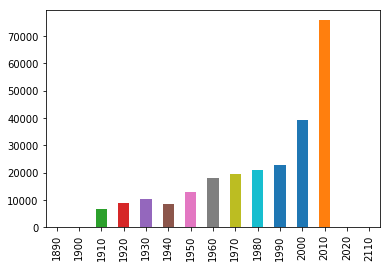

In [62]:
titles['decade'] = titles.year // 10 * 10
titles.decade = titles['decade']
table = titles.decade.value_counts().sort_index()
table.plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

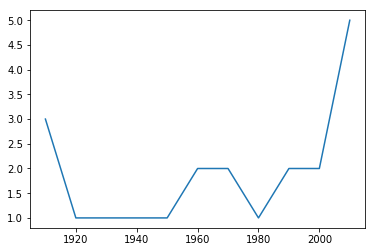

In [63]:
hamlet_indx = titles.title == 'Hamlet'
hamlet_data = titles[hamlet_indx]
hamlet_table = hamlet_data.decade.value_counts().sort_index()
hamlet_table.plot(kind='line')

### Plot the number of "Rustler" characters in each decade of the history of film.

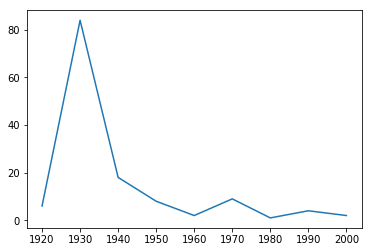

In [61]:
cast['decade'] = cast.year // 10 * 10
rustler_indx = cast.character == 'Rustler'
rustler_data = cast[rustler_indx]
rustler_table = rustler_data.decade.value_counts().sort_index()
rustler_table.plot()

### Plot the number of "Batman" characters each decade.

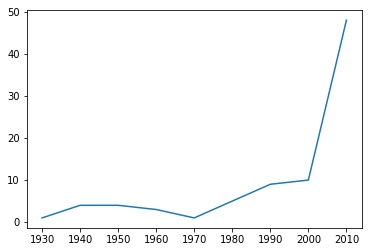

In [72]:
c = cast
batman_indx = (c.character == 'Batman')
bi = batman_indx
batman_data = c[bi]
bd = batman_data
batman_table = (bd.year // 10 * 10).value_counts().sort_index()
bt = batman_table
bt.plot()

### What are the 11 most common character names in movie history?

In [75]:
c = cast
c.character.value_counts().sort_values(ascending=False).head(10)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [81]:
c = cast
herself_credit_data = c[c.character == 'Herself']
hcd = herself_credit_data
hcd.name.value_counts().sort_values(ascending=False).head(10)

Queen Elizabeth II        12
Mar?a Luisa (V) Mart?n     9
Joyce Brothers             9
Luisa Horga                9
Margaret Thatcher          8
Hillary Clinton            8
Marta Berrocal             6
Sumie Sakai                6
Joan Rivers                6
In?s J. Southern           6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

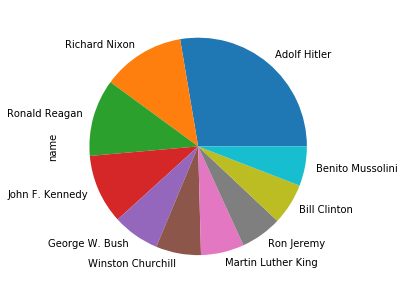

In [127]:
himself_table = cast[cast.character == 'Himself'].name.value_counts().sort_values(ascending=False).head(10)
himself_table.plot(kind='pie', figsize=[10,5])

### Which actors or actresses appeared in the most movies in the year 1945?

In [87]:
movies1945 = cast[(cast.year == 1945)]
movies1945.name.value_counts().sort_values(ascending=False).head()

Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Nolan Leary        27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [91]:
cast[(cast.year==1985)].name.value_counts().sort_values(ascending=False).head()

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Raj Babbar       15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

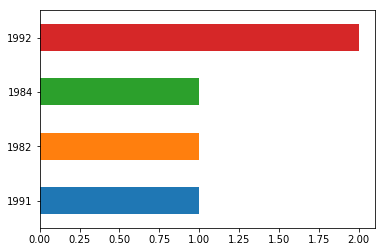

In [96]:
mammootty = cast[cast.character == 'Mammootty']
m = mammootty
mammootty_table = m.year.value_counts().sort_values()
mt = mammootty_table 
mt.plot(kind='barh')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [101]:
cast[(cast.character.str.startswith('Patron in'))].character.value_counts()[:9]

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [103]:
roles_start_science_data = cast[(cast.character.str.startswith('Science'))]
rssd = roles_start_science_data
rssd.character.value_counts()[:9]

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Fair Kid         5
Science Promo Cadet      5
Science Club Member      5
Science Reporter         5
Science Kid              5
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

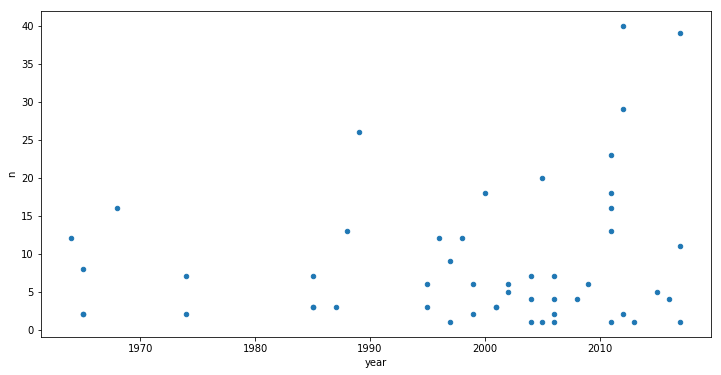

In [144]:
judi_dench_data = cast[(cast.name == 'Judi Dench') & (cast.n.notnull())]
jdd = judi_dench_data
jdd.plot(kind='scatter', x='year', y='n', figsize=[12,6])

### Plot the n-values of Cary Grant's roles through his career.

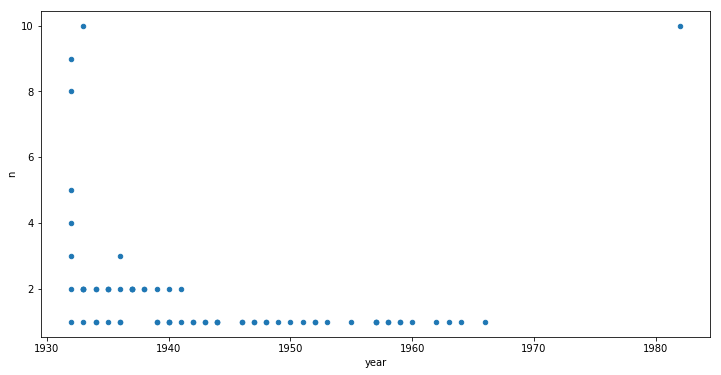

In [145]:
cary_grant_data = cast[(cast.name == 'Cary Grant') & (cast.n.notnull())]
cgd = cary_grant_data
cgd.plot(kind='scatter', x='year', y='n', figsize=[12,6])

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

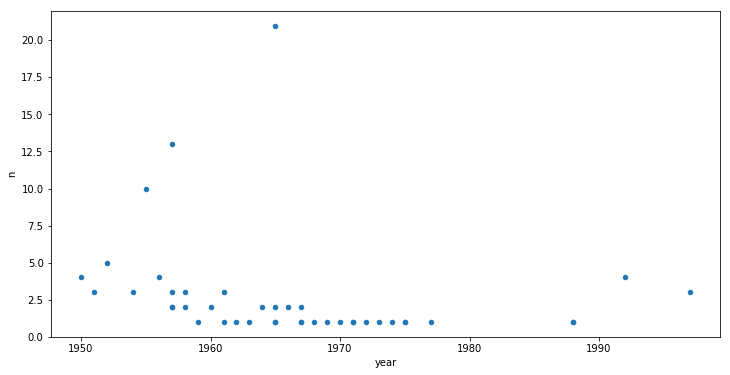

In [147]:
sir_sid_data = cast[(cast.name == 'Sidney Poitier') & (cast.n.notnull())]
ssd = sir_sid_data
ssd.plot(kind='scatter', x='year', y='n', figsize=[12,6])

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [151]:
leading_data = cast[(cast.n == 1) & (cast.year.between(1950, 1960))]
lead_data_table = leading_data.type.value_counts()
lead_data_table

actor      7425
actress    3342
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [152]:
leading_data = cast[(cast.n == 2) & (cast.year.between(1950, 1960))]
lead_data_table = leading_data.type.value_counts()
lead_data_table

actor      5142
actress    5113
Name: type, dtype: int64